# Test Grafico

## Cargando Librerias

In [1]:
import scipy.io as sio
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras import Input
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
import numpy as np
import os

## definiendo rutas 

In [2]:
datasetPath = '../../Datasets/csv/Salinas.csv'
directorio="../../"
directorioModelos=directorio+"modelos2/"
directorioPesos=directorio+"pesos2/"
base="Salinas_"


## cargando datos

In [3]:
data  =  pd.read_csv(datasetPath)

## transformando

In [4]:
X = data.iloc[:, :-1].values
y = data.iloc[:, -1].values

### forma del conjunto de datos

In [5]:
print(">>X: ",X.shape)
print(">>y: ",y.shape)

>>X:  (111104, 224)
>>y:  (111104,)


### imprimiendo muestra

(512, 217)


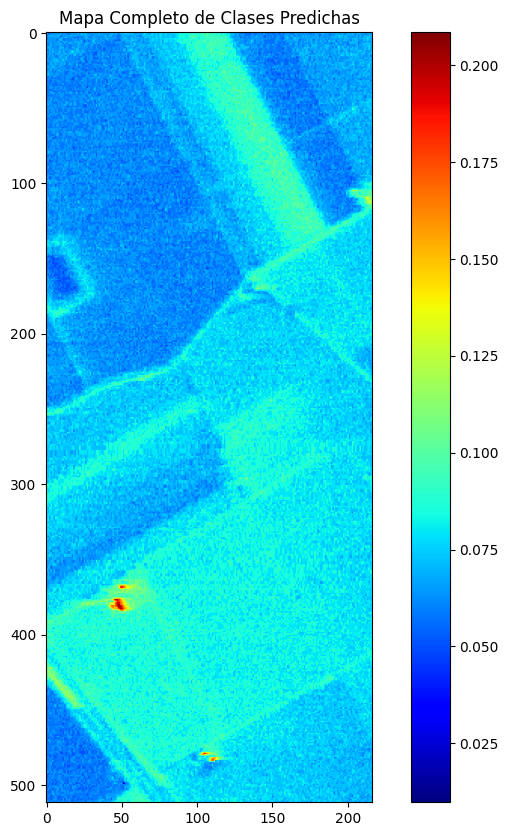

In [6]:
muestra=X[:,2:3]
muestra=muestra.reshape(512, 217)
print(muestra.shape)
plt.figure(figsize=(10, 10))
plt.imshow(muestra, cmap='jet')
plt.colorbar()
plt.title('Mapa Completo de Clases Predichas')
plt.show()

## preprocesado de los datos (YA SE APLICO)

In [7]:
#scaler = StandardScaler()
#X = scaler.fit_transform(X)

## definiendo modelos a leer

In [8]:
modelos = [
    "_TL", "_ENN", "_OSS", "_TL_SMOTE", "_ENN_SMOTE", "_OSS_SMOTE",  "_TL_ROS", "_ENN_ROS", "_OSS_ROS",
    "C1_TL", "C1_ENN", "C1_OSS", "C1_TL_SMOTE", "C1_ENN_SMOTE", "C1_OSS_SMOTE", "C1_TL_ROS", "C1_ENN_ROS", "C1_OSS_ROS",
    "C2_TL", "C2_ENN", "C2_OSS", "C2_TL_SMOTE", "C2_ENN_SMOTE", "C2_OSS_SMOTE", "C2_TL_ROS", "C2_ENN_ROS", "C2_OSS_ROS",
    "C3_TL", "C3_ENN", "C3_OSS", "C3_TL_SMOTE", "C3_ENN_SMOTE", "C3_OSS_SMOTE", "C3_TL_ROS", "C3_ENN_ROS", "C3_OSS_ROS",
    "C4_TL", "C4_ENN", "C4_OSS", "C4_TL_SMOTE", "C4_ENN_SMOTE", "C4_OSS_SMOTE", "C4_TL_ROS", "C4_ENN_ROS", "C4_OSS_ROS"
]

In [9]:
models=[]
modelosArchivos=[]
for nameModel in modelos:
    modeloArchivo=directorioModelos+base+nameModel+".h5"
    pesoArchivo=directorioPesos+base+nameModel+".weights.h5"
    try:
        print(">>> Cargando modelo: ",modeloArchivo," con los pesos: ",pesoArchivo)  
        model = tf.keras.models.load_model(modeloArchivo)
        print(modeloArchivo," cargado")
        model.load_weights(pesoArchivo)
        print(pesoArchivo," cargado")
        models.append(model)
        modelosArchivos.append(modeloArchivo)    
    except Exception  as error:
        print(">>> Error: ",error)




>>> Cargando modelo:  ../../modelos2/Salinas__TL.h5  con los pesos:  ../../pesos2/Salinas__TL.weights.h5
../../modelos2/Salinas__TL.h5  cargado
../../pesos2/Salinas__TL.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas__ENN.h5  con los pesos:  ../../pesos2/Salinas__ENN.weights.h5
../../modelos2/Salinas__ENN.h5  cargado
../../pesos2/Salinas__ENN.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas__OSS.h5  con los pesos:  ../../pesos2/Salinas__OSS.weights.h5
../../modelos2/Salinas__OSS.h5  cargado
../../pesos2/Salinas__OSS.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas__TL_SMOTE.h5  con los pesos:  ../../pesos2/Salinas__TL_SMOTE.weights.h5
../../modelos2/Salinas__TL_SMOTE.h5  cargado
../../pesos2/Salinas__TL_SMOTE.weights.h5  cargado
>>> Cargando modelo:  ../../modelos2/Salinas__ENN_SMOTE.h5  con los pesos:  ../../pesos2/Salinas__ENN_SMOTE.weights.h5
../../modelos2/Salinas__ENN_SMOTE.h5  cargado
../../pesos2/Salinas__ENN_SMOTE.weights.h5  car

In [10]:
print(models)


[<keras.engine.functional.Functional object at 0x000001AB97E07E80>, <keras.engine.functional.Functional object at 0x000001AB97E06A40>, <keras.engine.functional.Functional object at 0x000001AB9C3DD780>, <keras.engine.functional.Functional object at 0x000001AB9C3F90F0>, <keras.engine.functional.Functional object at 0x000001AB9C438FD0>, <keras.engine.functional.Functional object at 0x000001AB9C438E80>, <keras.engine.functional.Functional object at 0x000001AB9C478FD0>, <keras.engine.functional.Functional object at 0x000001AB9C492560>, <keras.engine.functional.Functional object at 0x000001AB9C492410>, <keras.engine.functional.Functional object at 0x000001AB9C47B7C0>, <keras.engine.functional.Functional object at 0x000001ABFFC60E50>, <keras.engine.functional.Functional object at 0x000001ABFFC7E410>, <keras.engine.functional.Functional object at 0x000001ABFFC9B9D0>, <keras.engine.functional.Functional object at 0x000001ABFFC63040>, <keras.engine.functional.Functional object at 0x000001ABFFCE4

## Prediccion

3472/3472 [==============================] - 8s 2ms/step


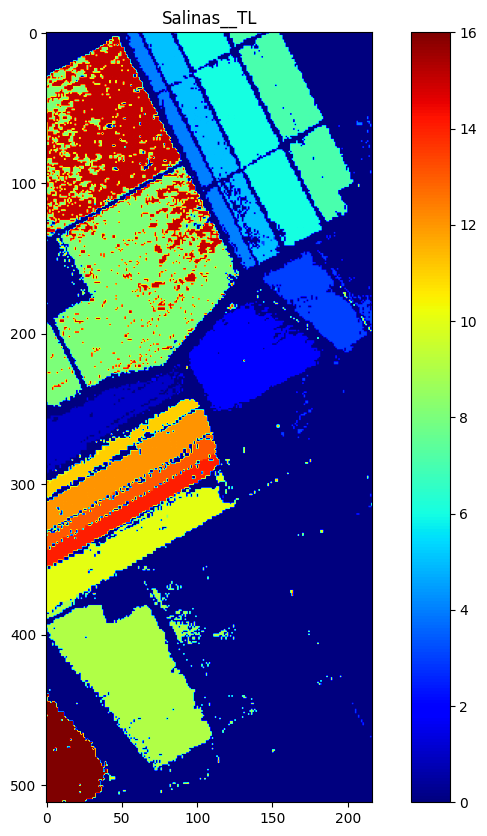

3472/3472 [==============================] - 7s 2ms/step


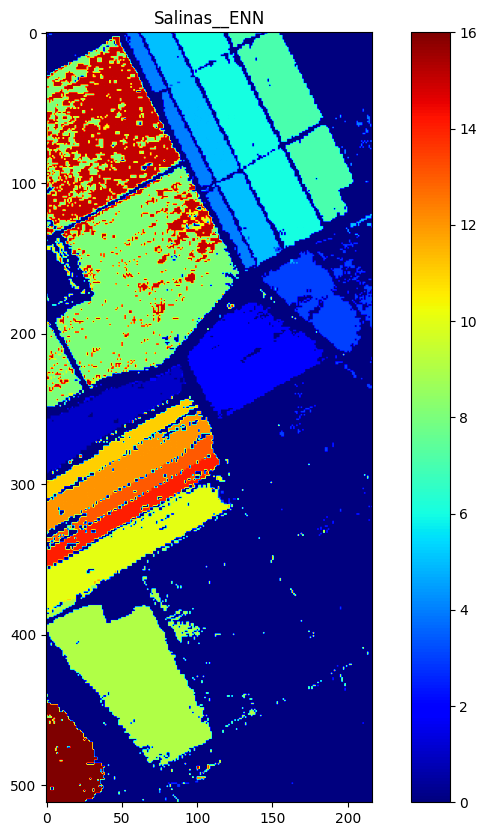

3472/3472 [==============================] - 7s 2ms/step


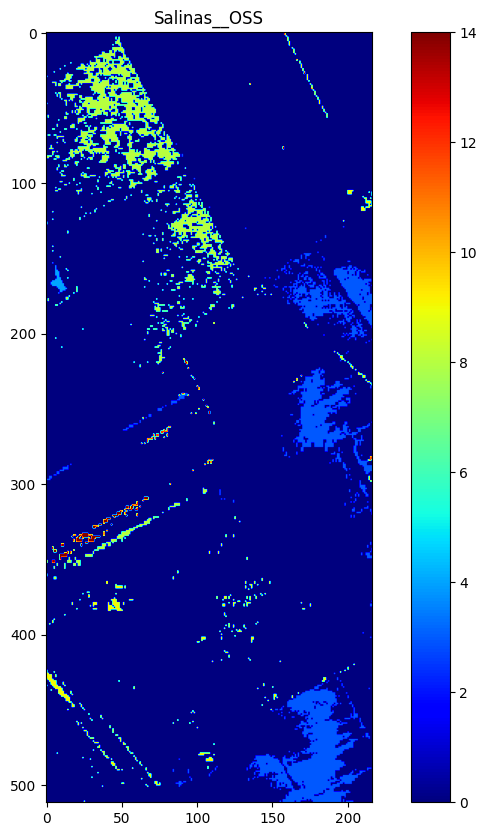

3472/3472 [==============================] - 7s 2ms/step


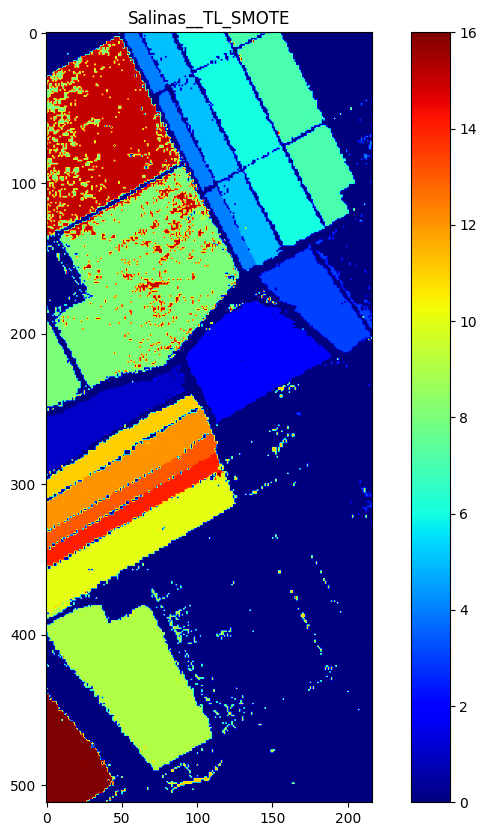

3472/3472 [==============================] - 7s 2ms/step


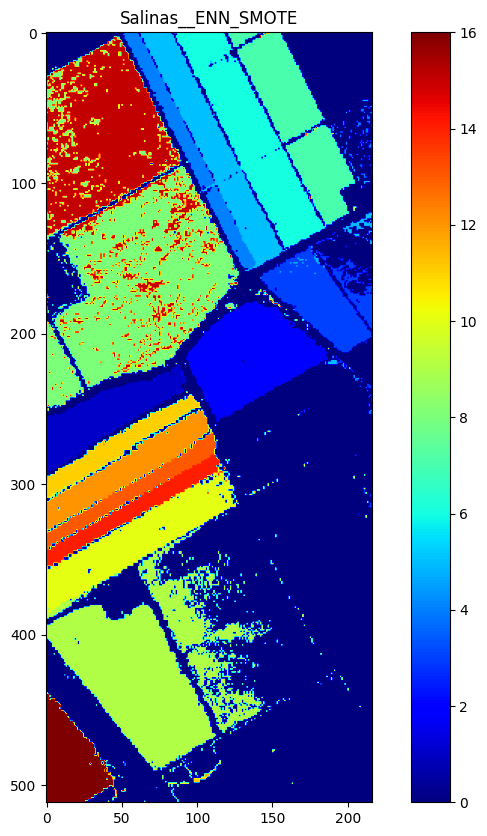

3472/3472 [==============================] - 8s 2ms/step


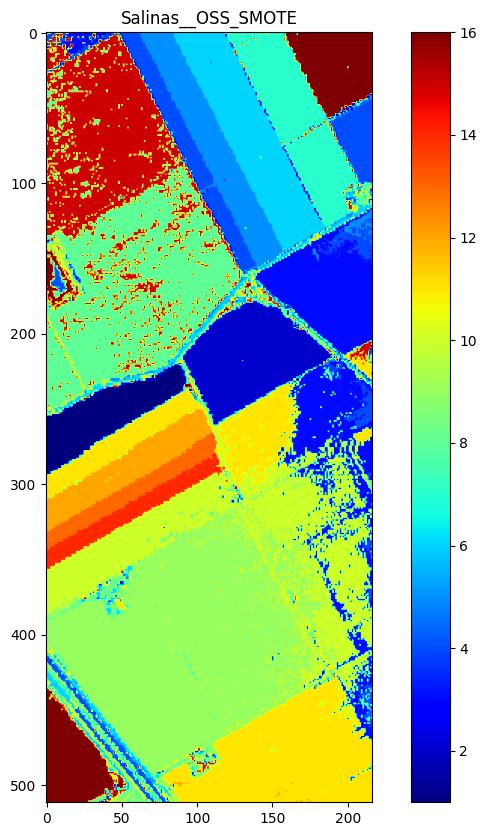

3472/3472 [==============================] - 7s 2ms/step


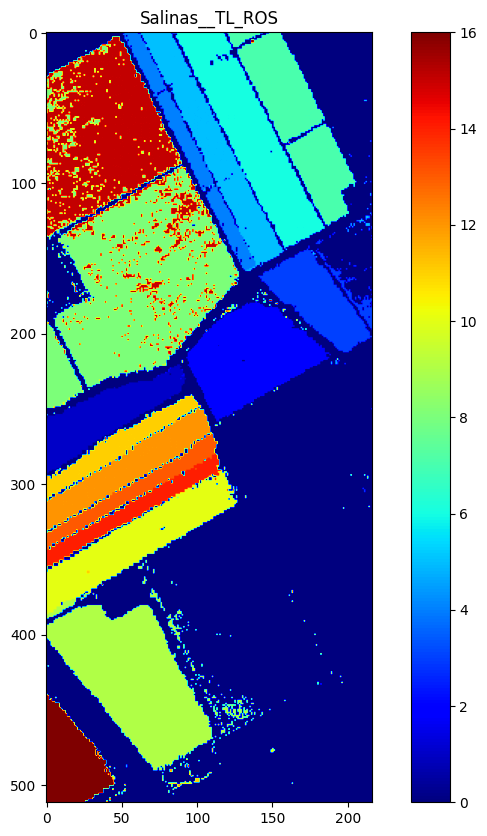

3472/3472 [==============================] - 7s 2ms/step


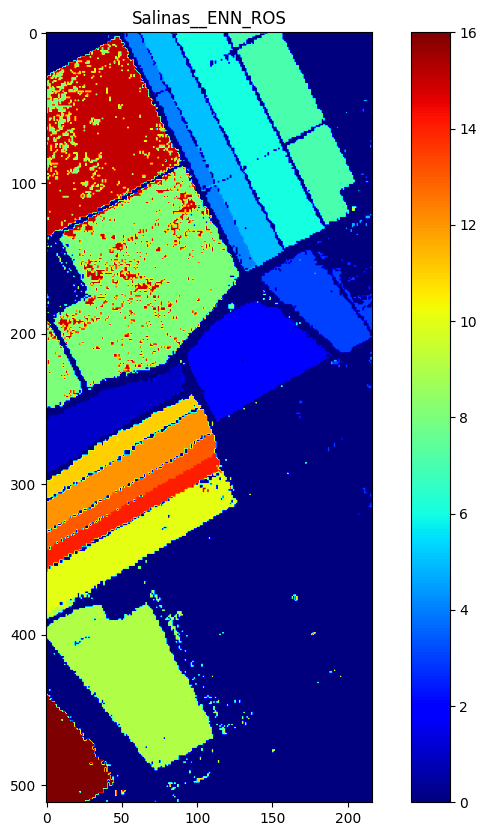

3472/3472 [==============================] - 7s 2ms/step


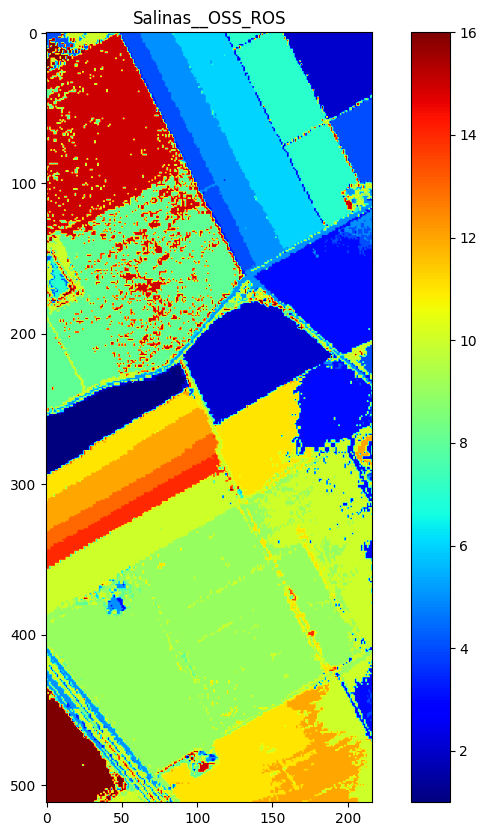

3472/3472 [==============================] - 7s 2ms/step


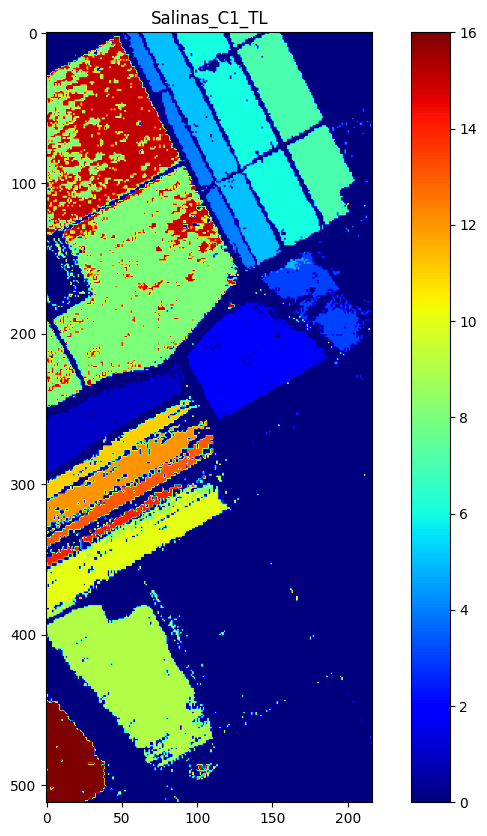

3472/3472 [==============================] - 7s 2ms/step


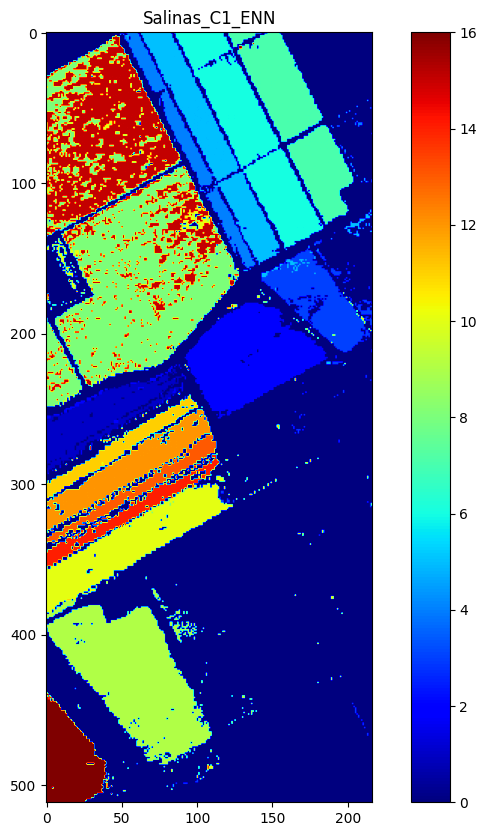

3472/3472 [==============================] - 7s 2ms/step


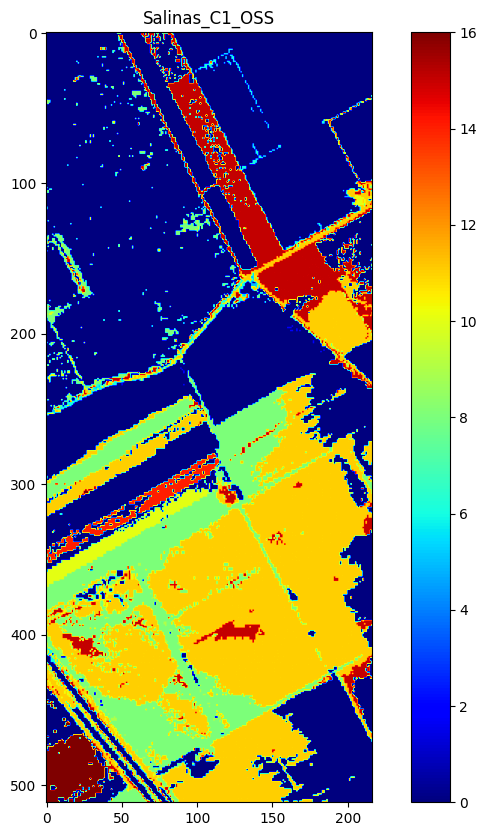

3472/3472 [==============================] - 8s 2ms/step


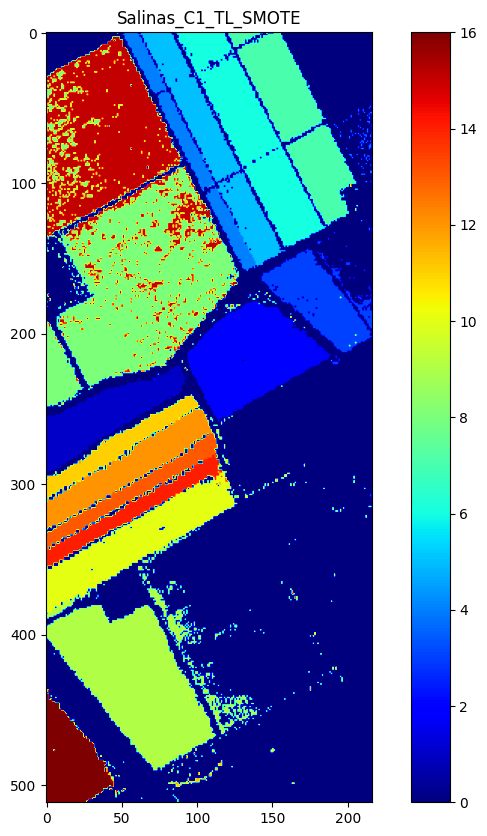

3472/3472 [==============================] - 8s 2ms/step


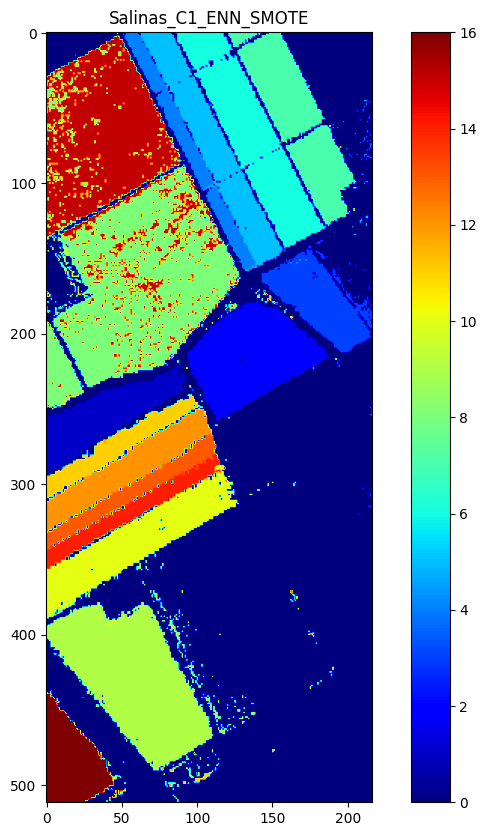

3472/3472 [==============================] - 8s 2ms/step


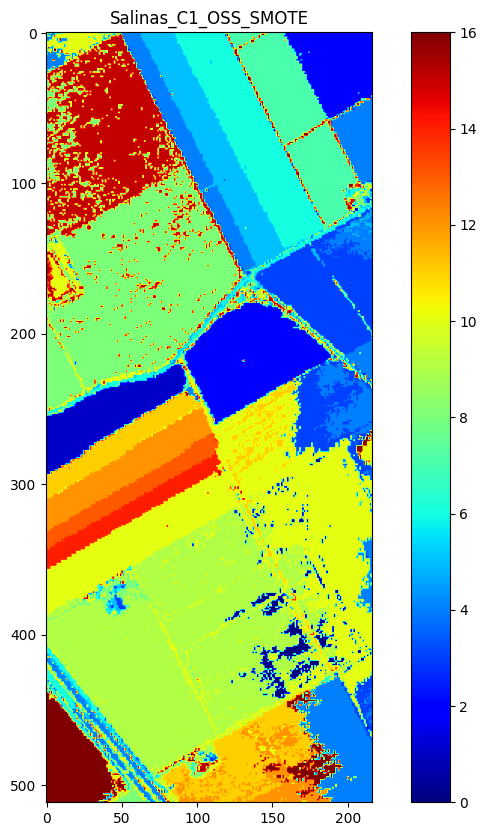

3472/3472 [==============================] - 7s 2ms/step


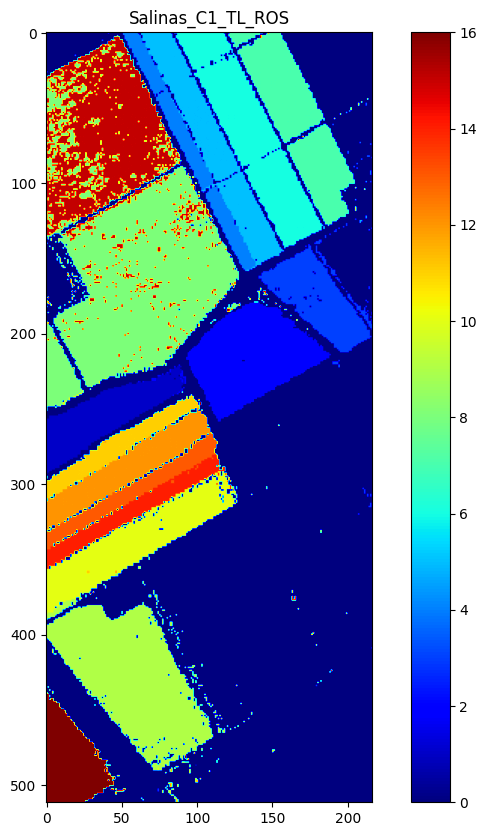

3472/3472 [==============================] - 8s 2ms/step


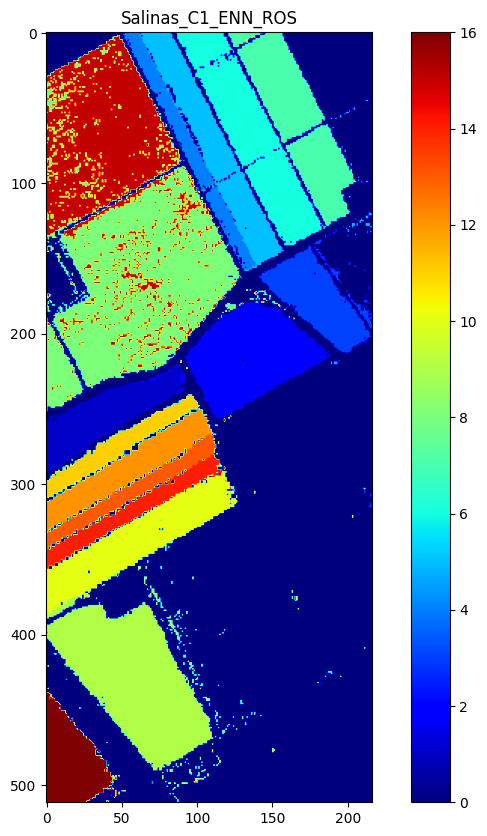

3472/3472 [==============================] - 7s 2ms/step


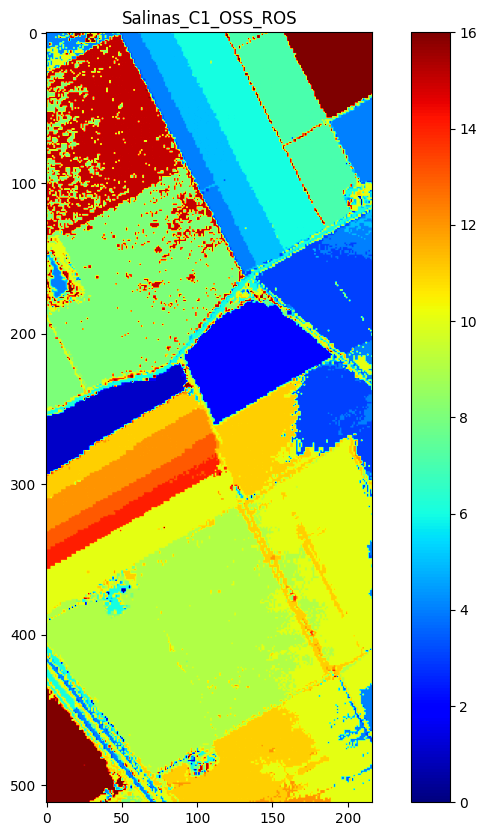

3472/3472 [==============================] - 7s 2ms/step


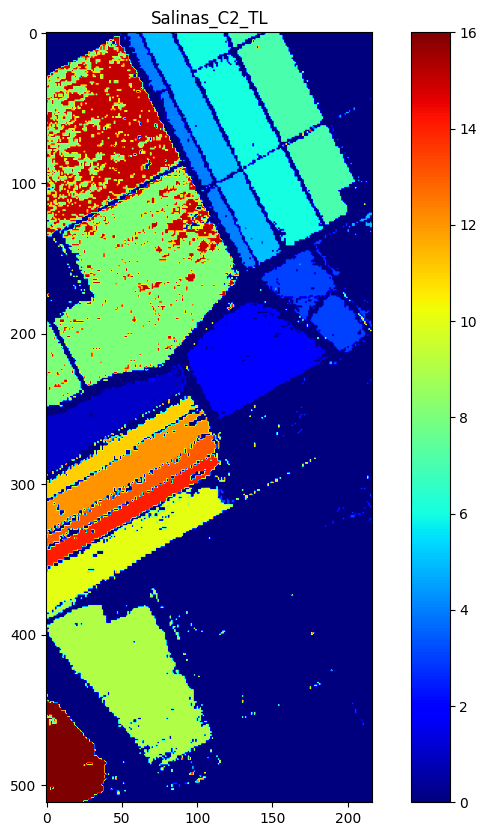

3472/3472 [==============================] - 8s 2ms/step


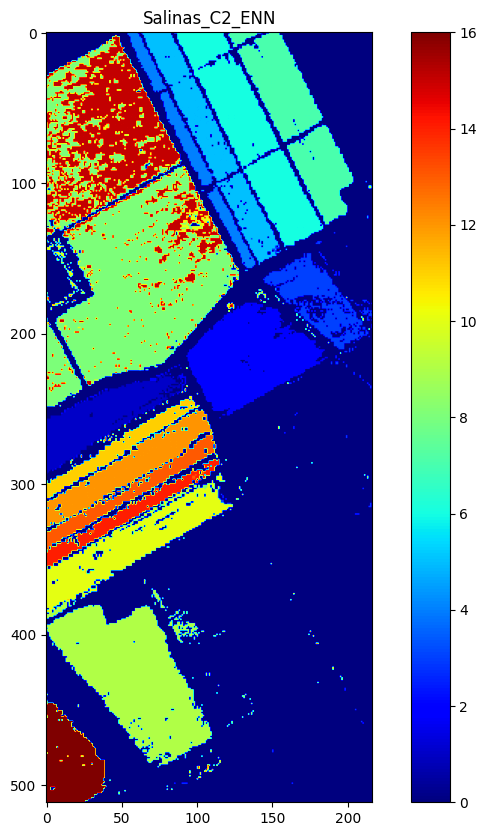

3472/3472 [==============================] - 8s 2ms/step


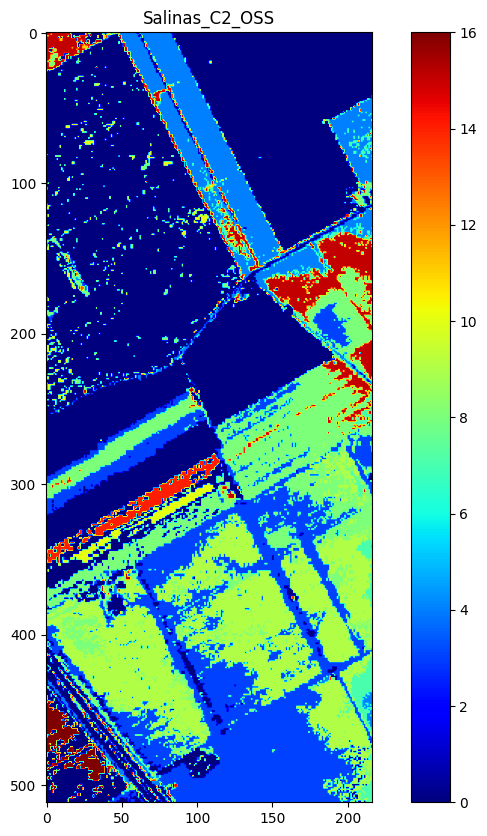

3472/3472 [==============================] - 8s 2ms/step


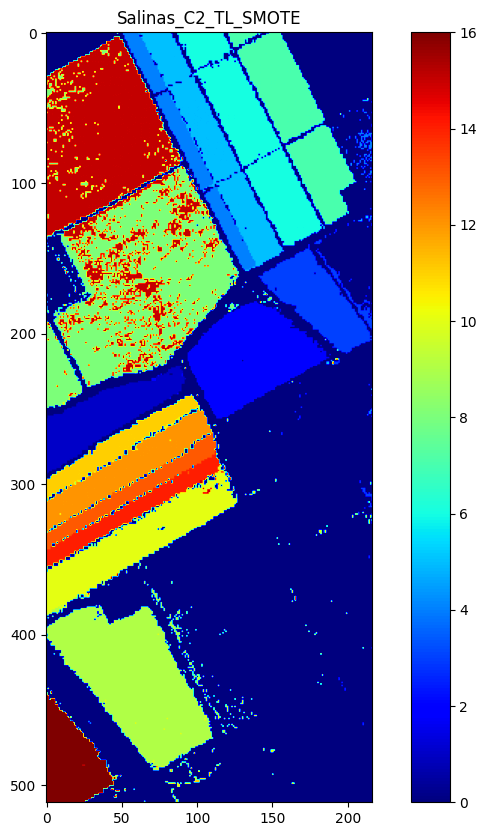

3472/3472 [==============================] - 7s 2ms/step


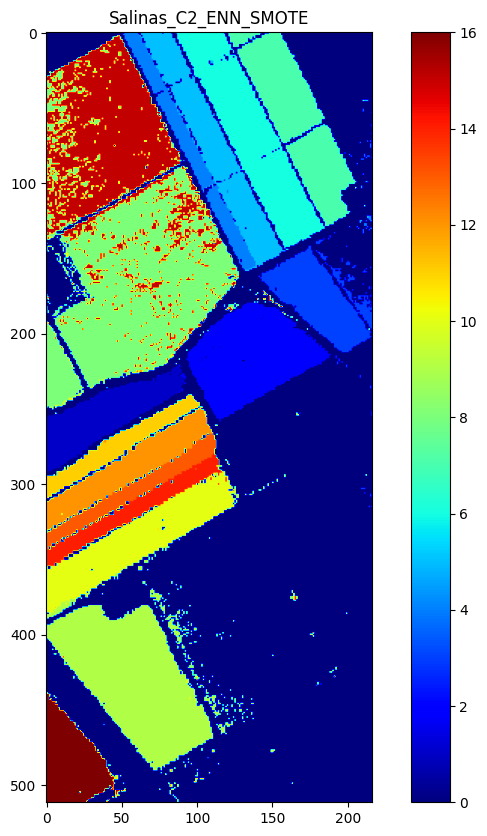

3472/3472 [==============================] - 7s 2ms/step


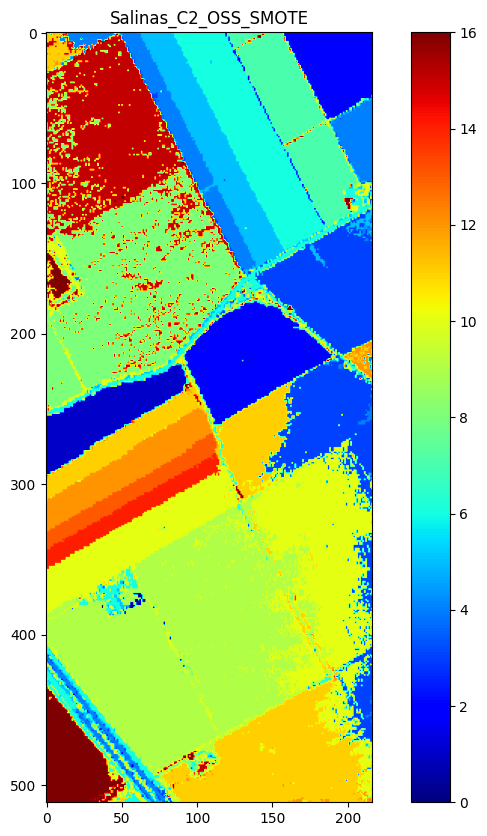

3472/3472 [==============================] - 8s 2ms/step


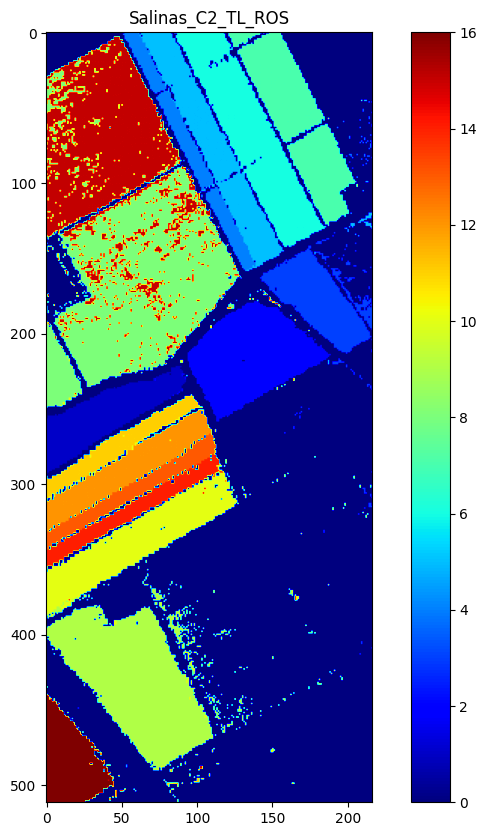

3472/3472 [==============================] - 8s 2ms/step


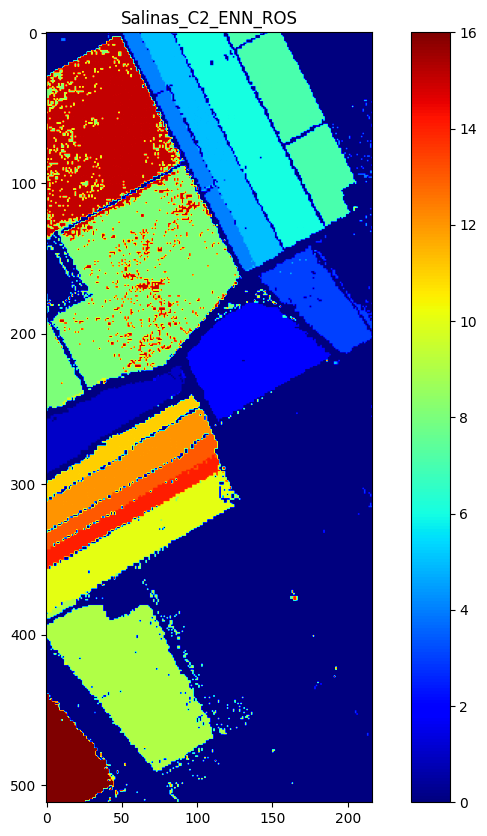

3472/3472 [==============================] - 8s 2ms/step


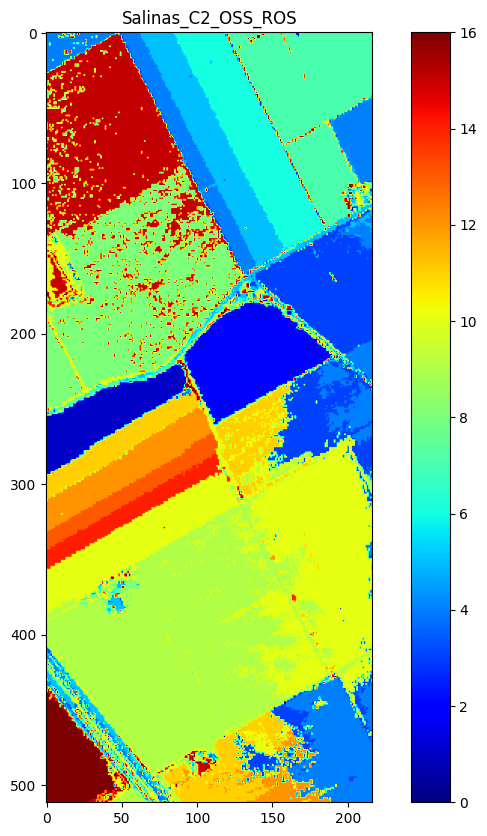

3472/3472 [==============================] - 7s 2ms/step


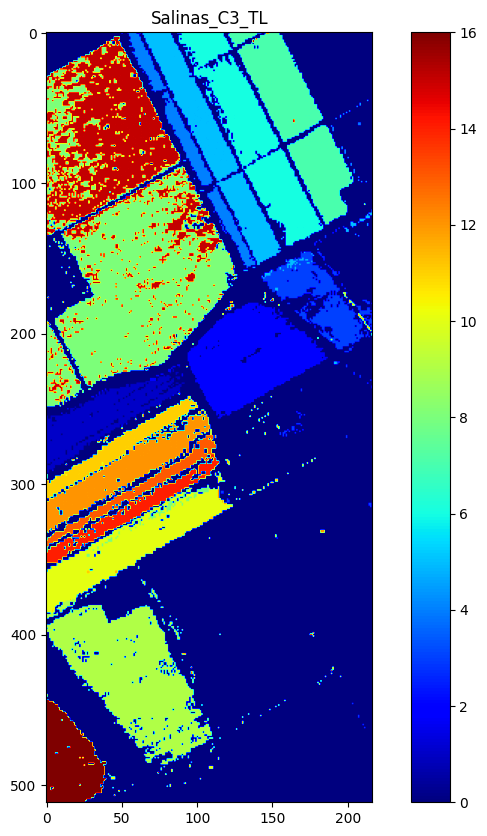

3472/3472 [==============================] - 7s 2ms/step


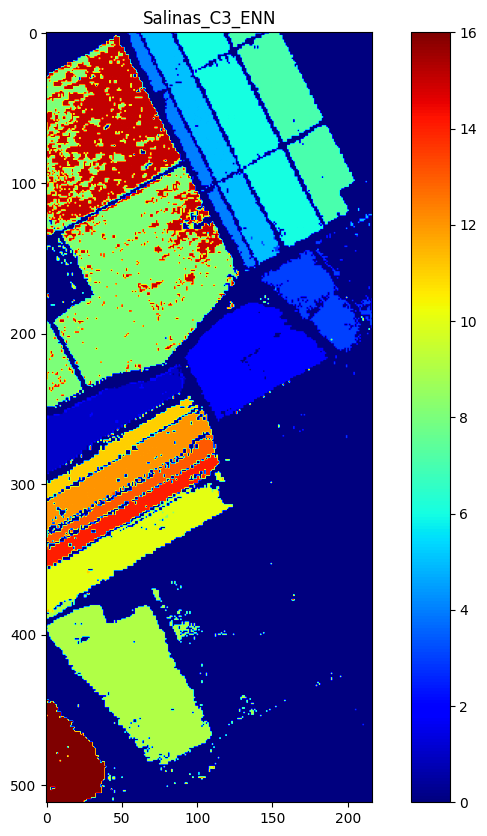

3472/3472 [==============================] - 8s 2ms/step


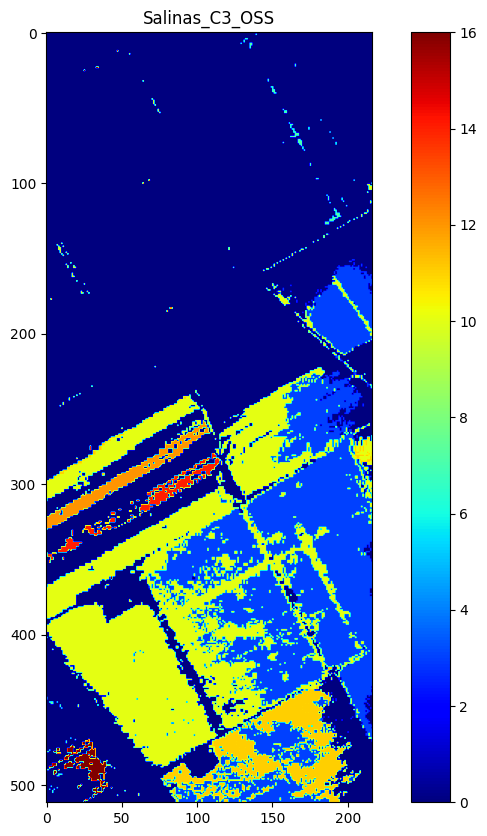

3472/3472 [==============================] - 7s 2ms/step


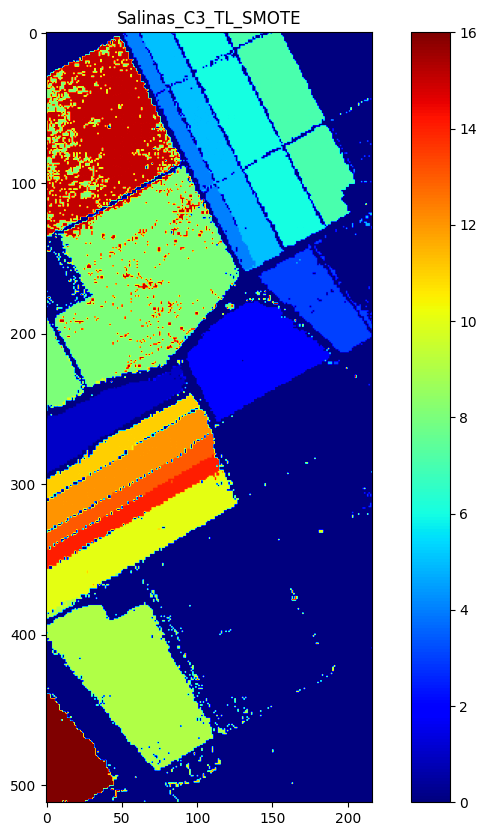

3472/3472 [==============================] - 7s 2ms/step


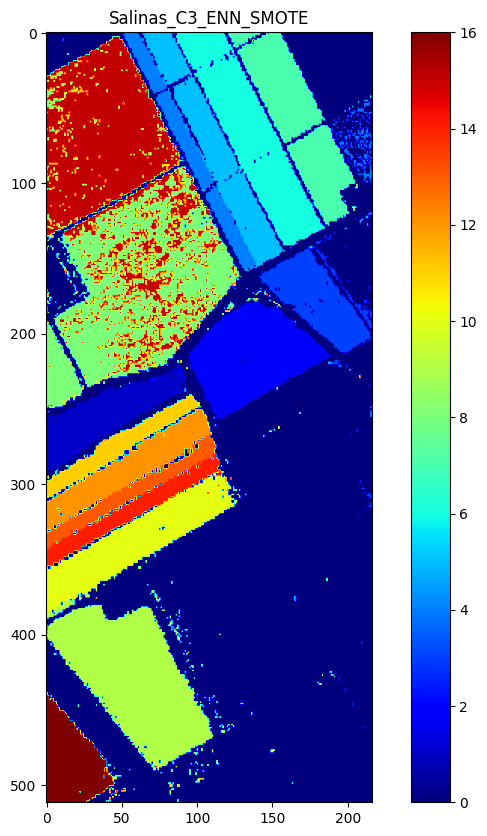

3472/3472 [==============================] - 8s 2ms/step


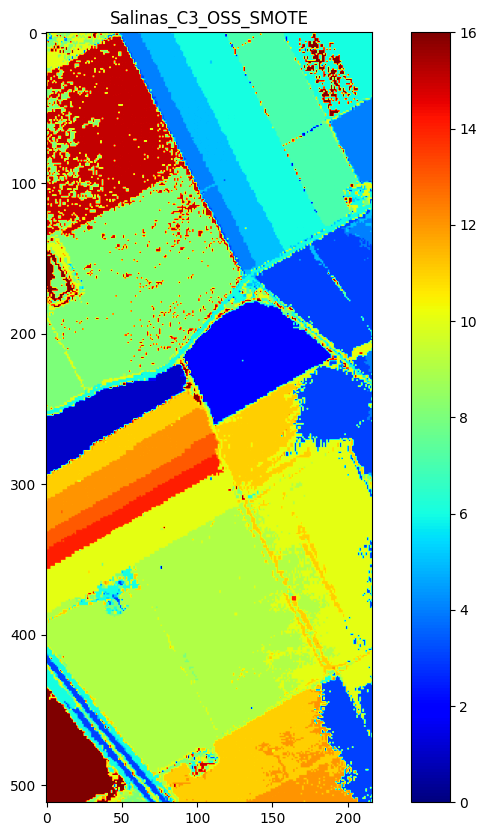

3472/3472 [==============================] - 8s 2ms/step


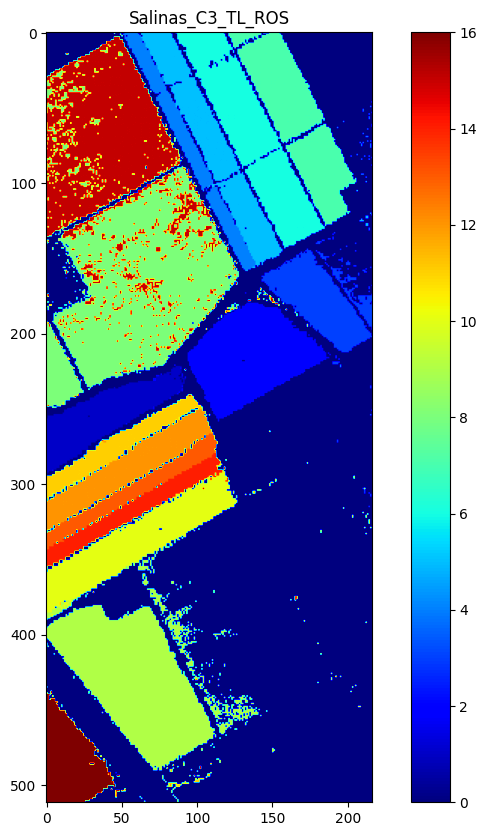

3472/3472 [==============================] - 7s 2ms/step


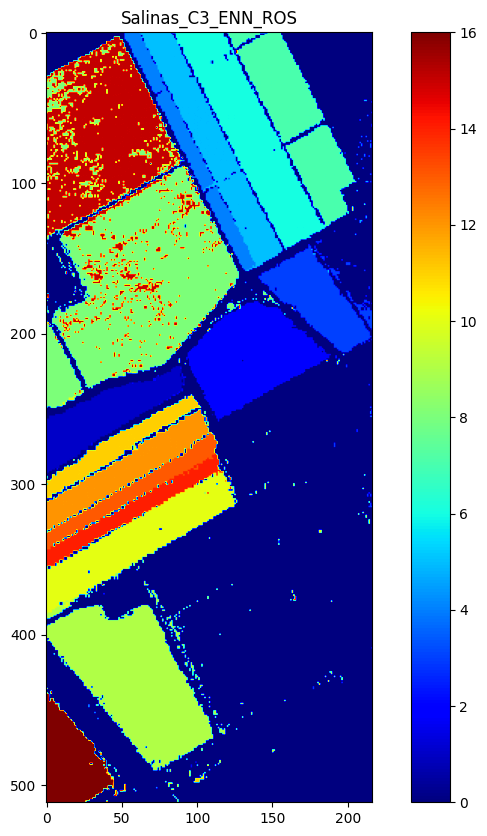

3472/3472 [==============================] - 7s 2ms/step


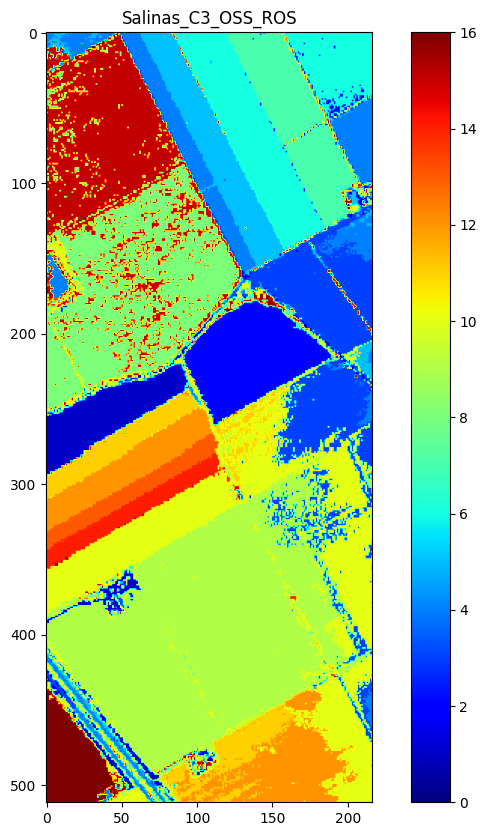

3472/3472 [==============================] - 8s 2ms/step


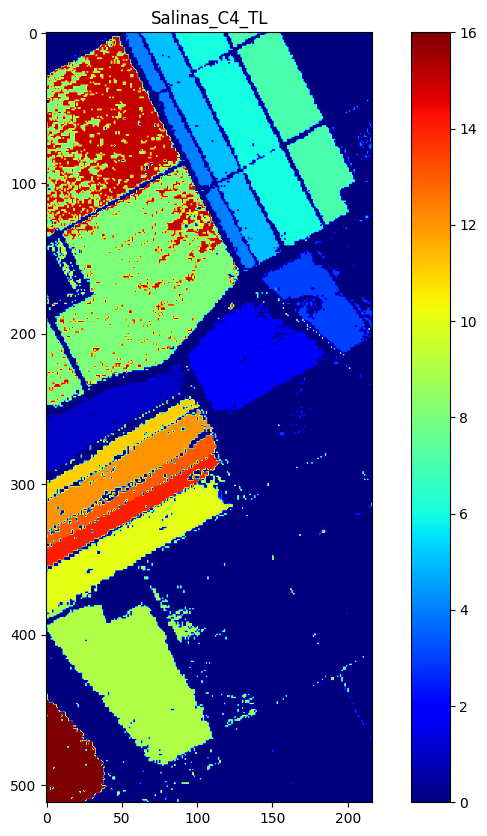

3472/3472 [==============================] - 8s 2ms/step


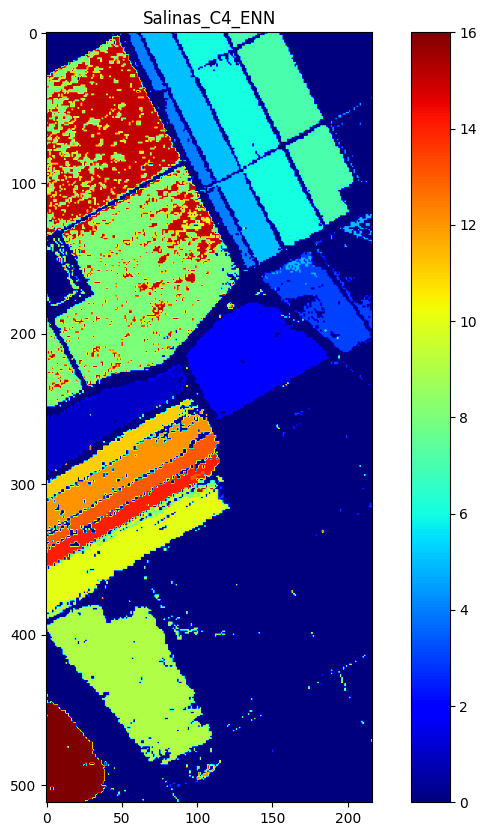

3472/3472 [==============================] - 8s 2ms/step


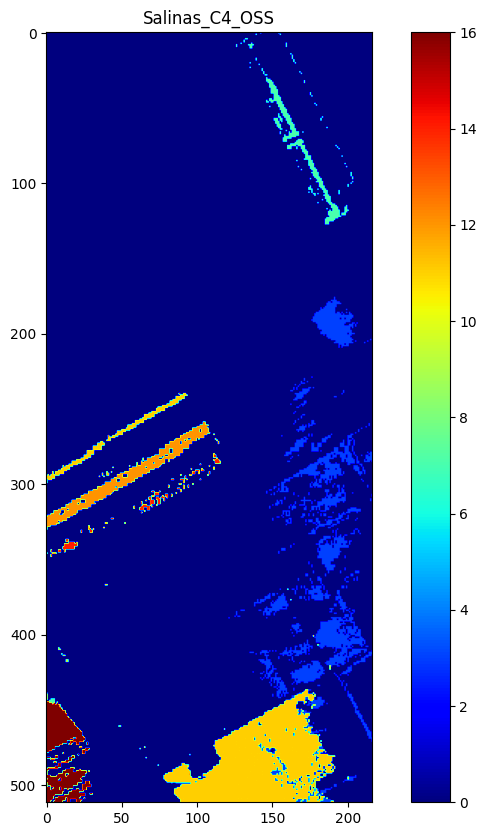

3472/3472 [==============================] - 7s 2ms/step


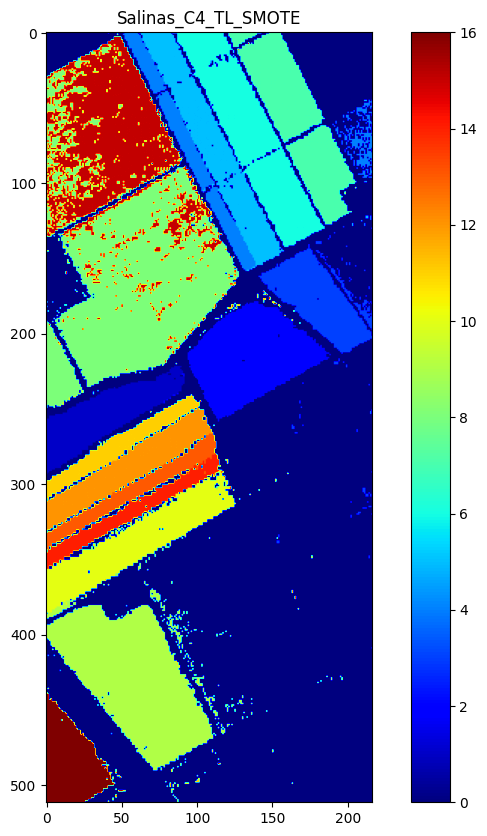

3472/3472 [==============================] - 8s 2ms/step


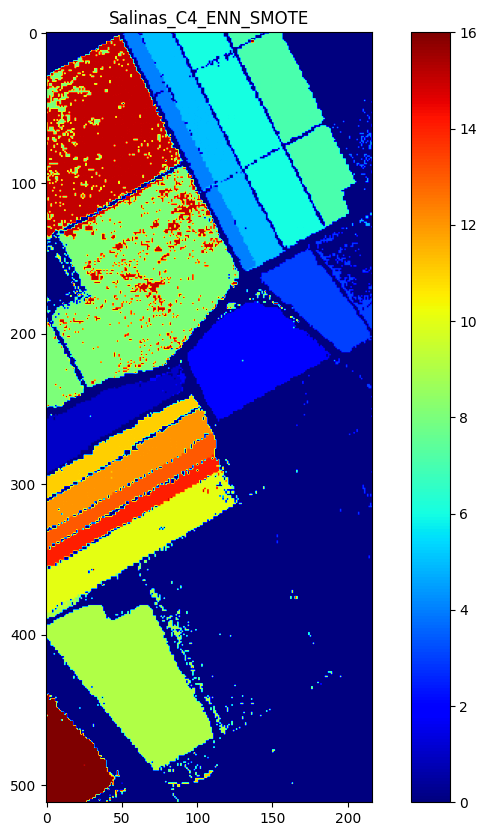

3472/3472 [==============================] - 7s 2ms/step


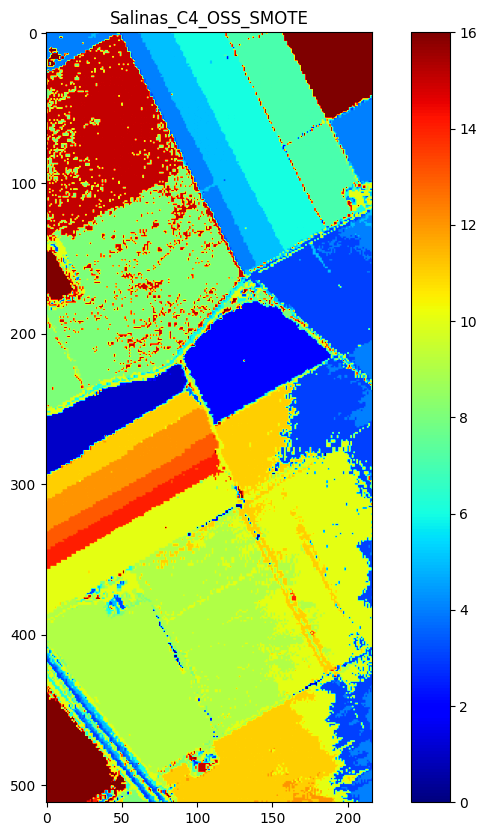

3472/3472 [==============================] - 7s 2ms/step


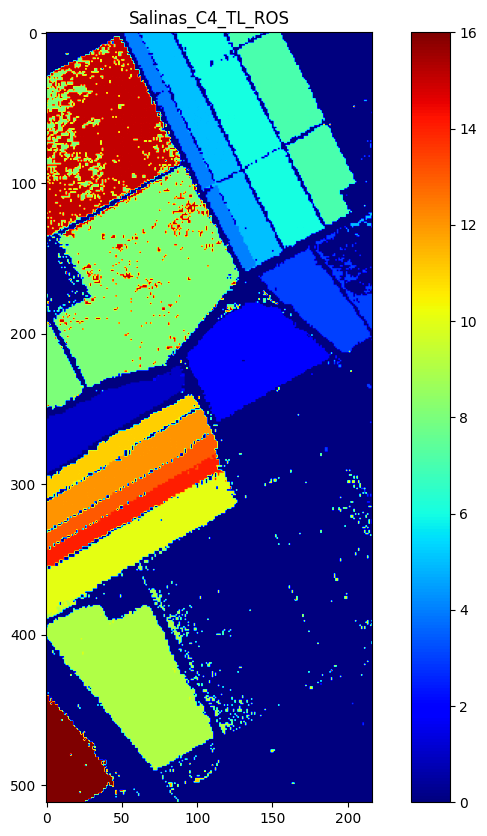

3472/3472 [==============================] - 7s 2ms/step


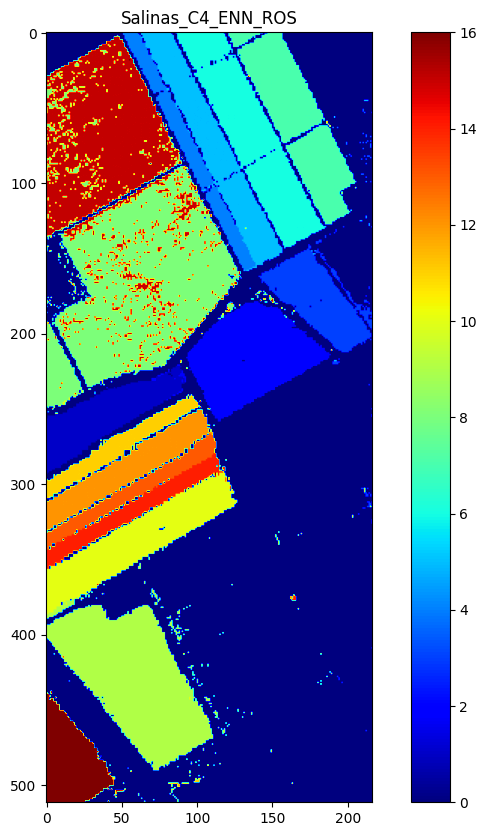

3472/3472 [==============================] - 7s 2ms/step


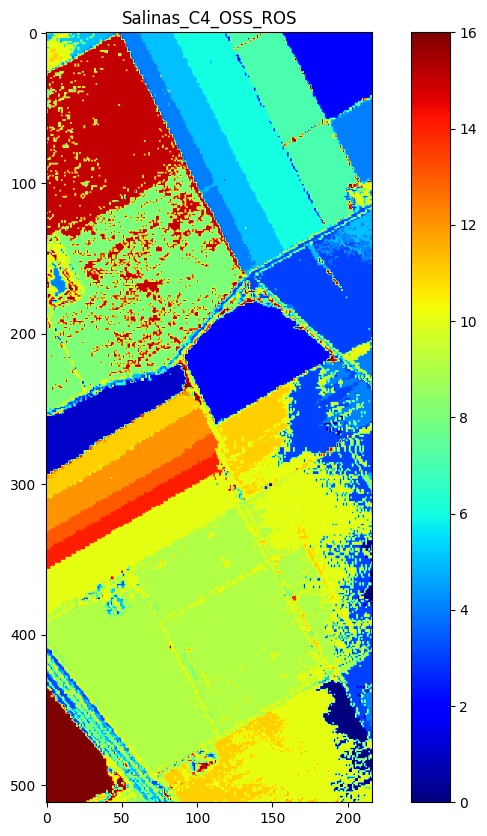

In [11]:
i=0
for model in models:
    # Hacer predicciones en todo el conjunto de datos
    predictions = model.predict(X)
    predicted_classes = np.argmax(predictions, axis=1)
    predicted_map = predicted_classes.reshape(512, 217)
    plt.figure(figsize=(10, 10))
    plt.imshow(predicted_map, cmap='jet')
    plt.colorbar()
    nombreModelo=str(modelosArchivos[i].split("/")[3].split(".")[0])
    plt.title(nombreModelo)
    plt.savefig(str("../../resources/"+base+"_"+"TestGrafico_"+nombreModelo  ))
    plt.show()
    i=i+1